In [1]:
pip install pandas matplotlib

     |████████████████████████████████| 12.4 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import urllib.request, json 
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline


NAT_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
NAT_TXT_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

with urllib.request.urlopen(NAT_JSON_URL) as url:
	data = json.loads(url.read().decode())

df = pd.DataFrame.from_dict(data)
#pd.DataFrame(df, columns = ("nuovi_attualmente_positivi"));
df2 = df['deceduti']
nuovi_deceduti = df2.diff(periods=1);
nuovi_deceduti[0]=0

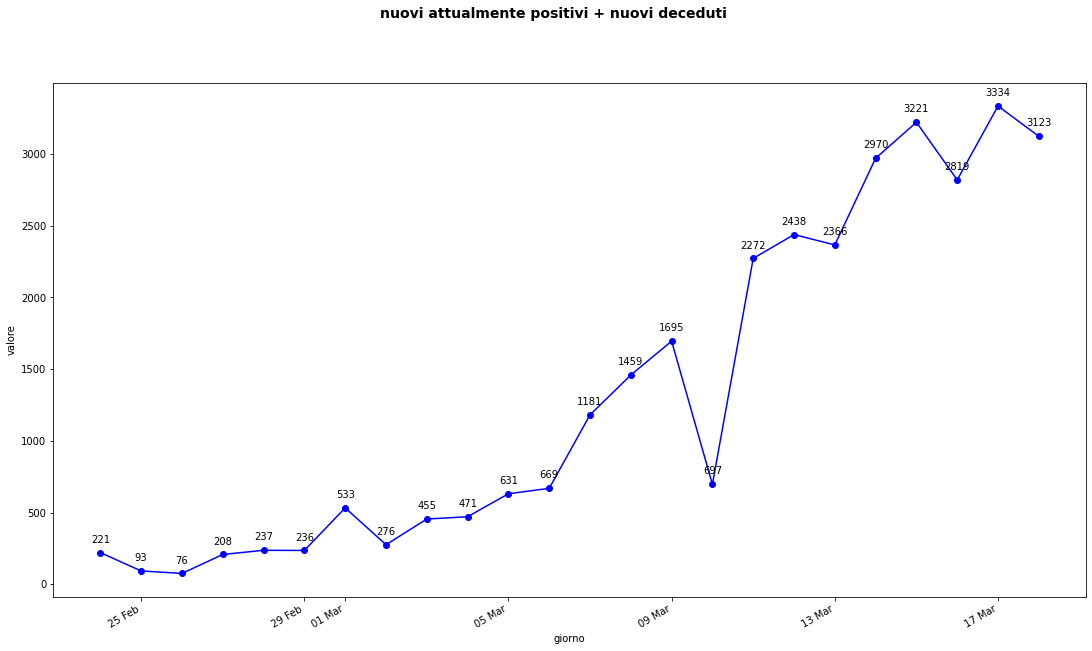

In [5]:
myDates = [datetime.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in df['data']]
myValues = [int(x)+int(y) for x,y in zip(df['nuovi_attualmente_positivi'], nuovi_deceduti)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('nuovi attualmente positivi + nuovi deceduti', fontsize=14, fontweight='bold')
ax.set_xlabel('giorno',
                      horizontalalignment='center')
ax.set_ylabel('valore')

#plt.figure(figsize=(1,1))

ax.plot(myDates, myValues,'bo-')

myFmt = DateFormatter("%d %b")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

# zip joins x and y coordinates in pairs
for x,y in zip(myDates, myValues):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()
